## 1. Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

# 2. Loading Dataset

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("turakut/plant-disease-classification")

print("Path to dataset files:", path)

100%|██████████| 350k/350k [00:00<00:00, 31.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/turakut/plant-disease-classification/versions/1


In [3]:
from pathlib import Path

dataset_path = kagglehub.dataset_download("turakut/plant-disease-classification")

dataset_directory = Path(dataset_path)

df = pd.read_csv(dataset_directory / "plant_disease_dataset.csv")

df.head()

Using Colab cache for faster access to the 'plant-disease-classification' dataset.


,temperature,humidity,rainfall,soil_pH,disease_present
0,27.483571,33.215053,0.572758,4.975875,1
1,24.308678,36.945005,42.522346,8.165266,0
2,28.238443,34.026189,16.095303,6.316734,1
3,32.615149,41.104180,20.311015,6.164949,0
4,23.829233,51.971785,11.851323,8.482468,0


# 3. Exploratory Data Analysis

In [4]:
print("Data Info: ")
df.info()

print("Missing values: ")
df.isnull().sum()

Data Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temperature      10000 non-null  float64
 1   humidity         10000 non-null  float64
 2   rainfall         10000 non-null  float64
 3   soil_pH          10000 non-null  float64
 4   disease_present  10000 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 390.8 KB
Missing values: 


,0
temperature,0
humidity,0
rainfall,0
soil_pH,0
disease_present,0


In [5]:
df.describe()

,temperature,humidity,rainfall,soil_pH,disease_present
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,25.612191,62.119300,9.807522,6.245855,0.241000
std,5.813841,22.679977,9.852130,1.302465,0.427712
min,5.387999,6.244209,0.000055,4.000075,0.000000
25%,21.815610,40.772925,2.812822,5.122970,0.000000
50%,25.293238,72.211752,6.864898,6.232188,0.000000
75%,28.916048,81.032999,13.442871,7.386377,0.000000
max,56.686495,102.395421,84.654161,8.499875,1.000000


/tmp/ipython-input-3117817490.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'disease_present', data=df, palette='Set1')


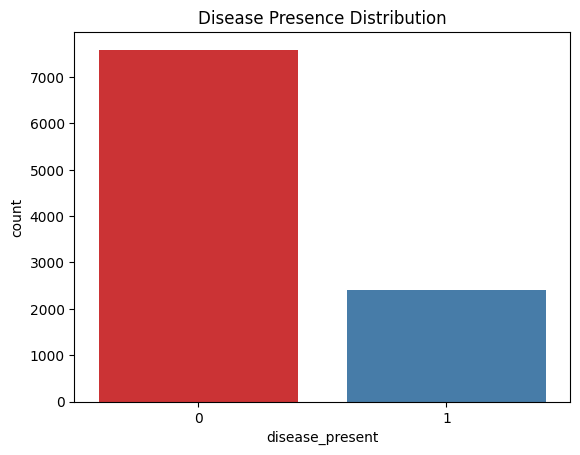

In [6]:
sns.countplot(x = 'disease_present', data=df, palette='Set1')
plt.title("Disease Presence Distribution")
plt.show()

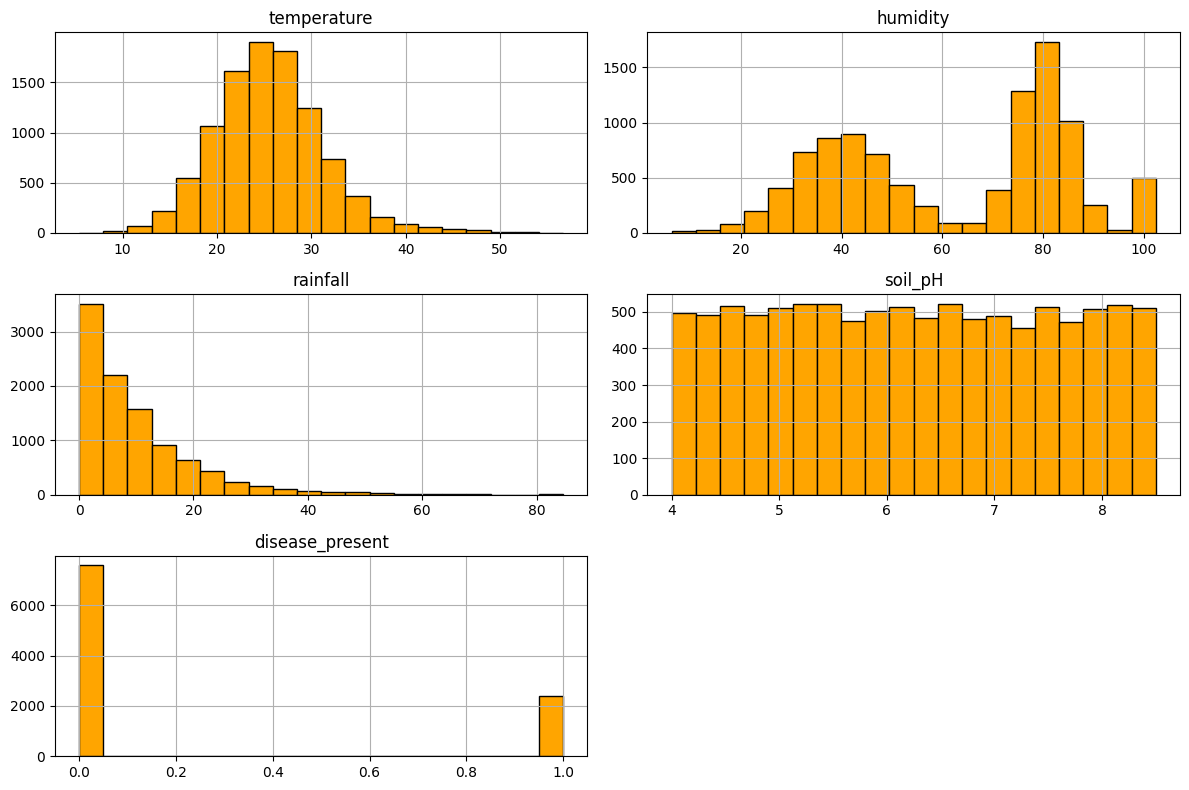

In [7]:
df.hist(bins = 20, figsize=(12,8), color='orange', edgecolor='black')
plt.tight_layout()
plt.show()

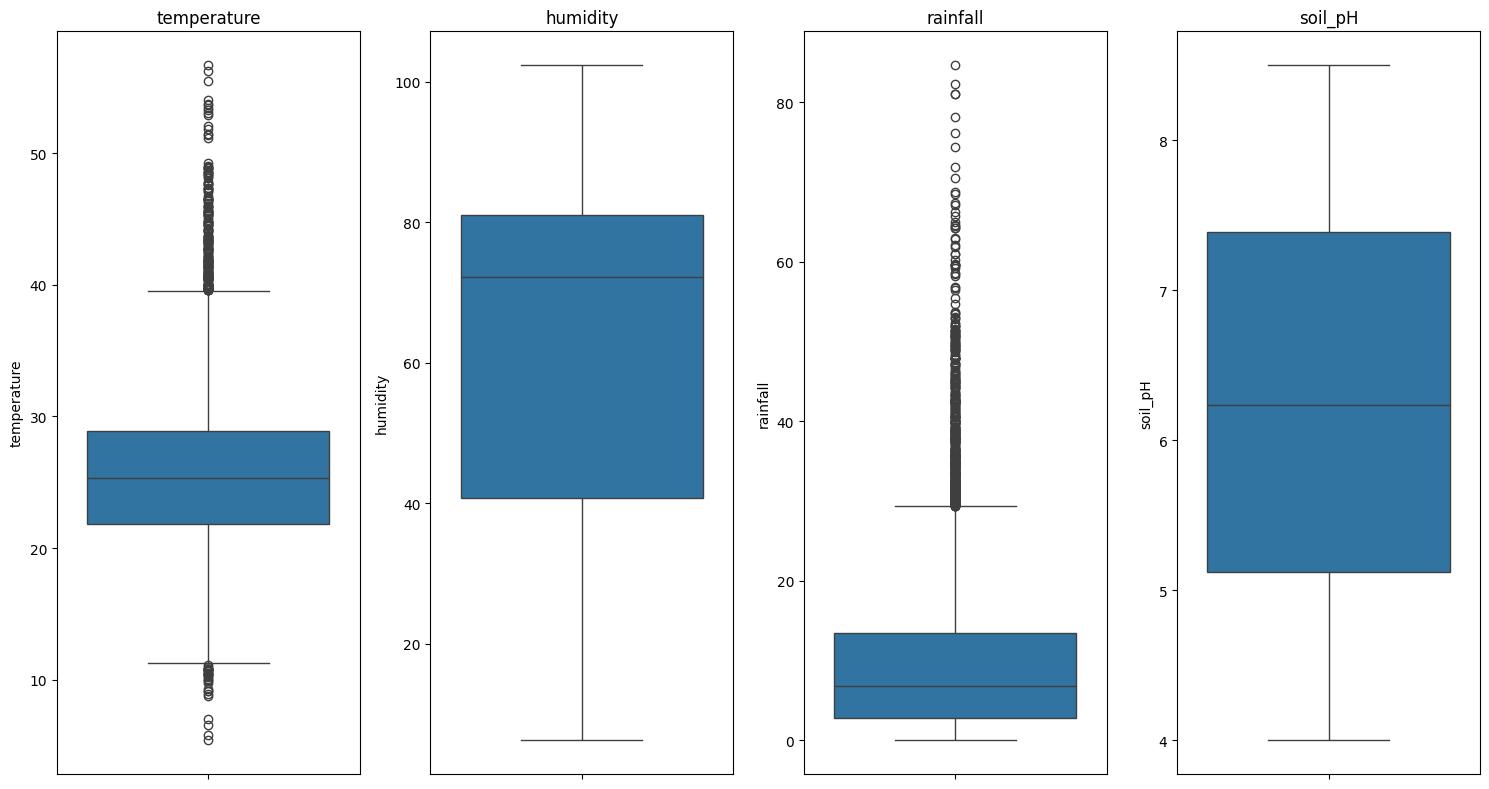

In [8]:
columns = [col for col in df.columns if col != 'disease_present']
plt.figure(figsize=(15,8))
for i, col in enumerate(columns, 1):
    plt.subplot(1, len(columns), i)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

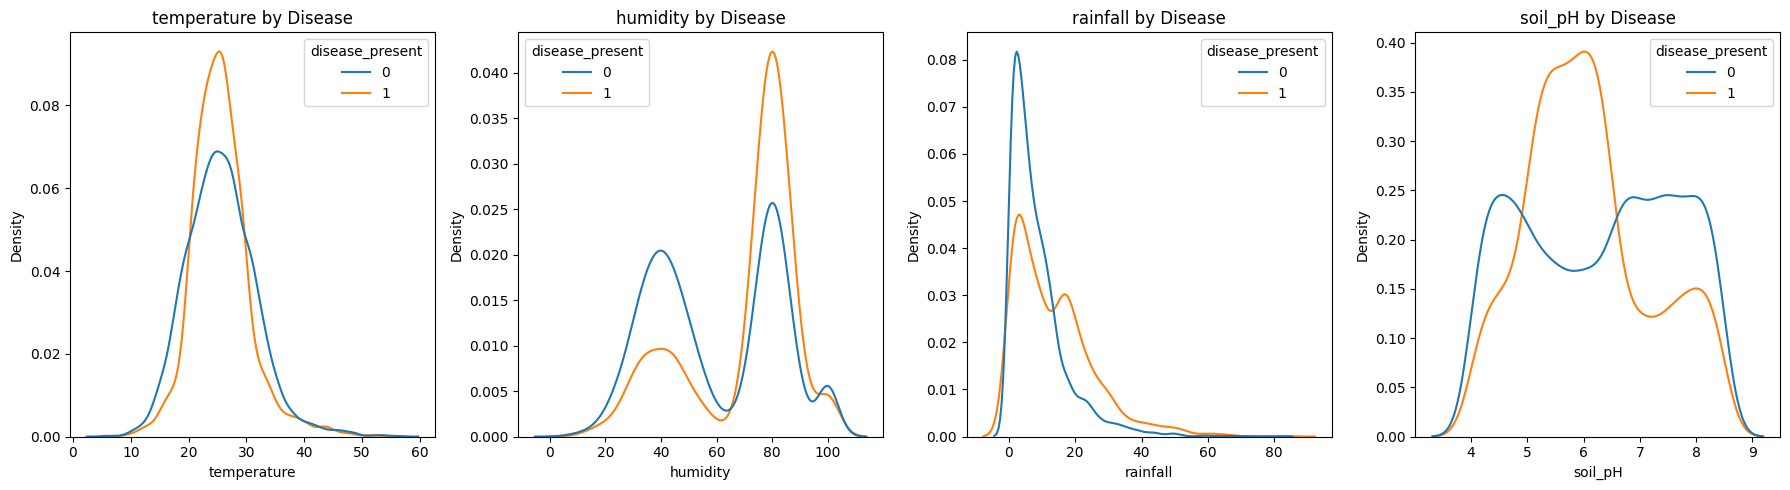

In [9]:

feature_names = [col for col in df.columns if col != 'disease_present']

figure, axes = plt.subplots(1, len(feature_names), figsize=(18, 5))

for index, feature in enumerate(feature_names):
    sns.kdeplot(
        data=df,
        x=feature,
        hue='disease_present',
        common_norm=False,
        ax=axes[index]
    )
    axes[index].set_title(f'{feature} by Disease')

plt.tight_layout()
plt.show()


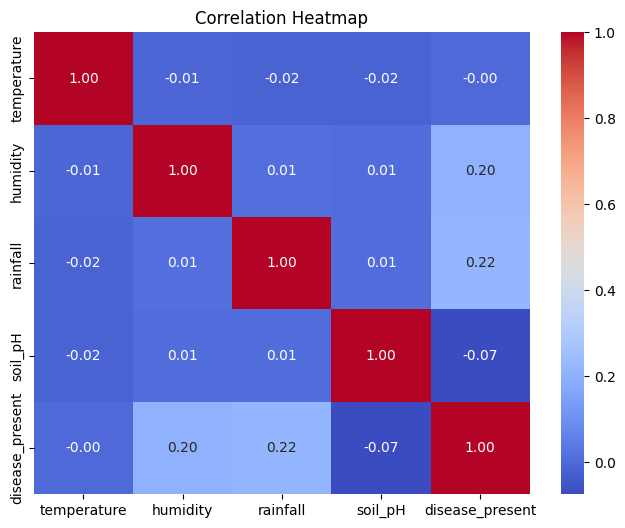

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 4. Splitting the dataset into training and testing

In [11]:
feature_columns = ['temperature', 'humidity', 'rainfall', 'soil_pH']

In [12]:
X = df[feature_columns]
y = df['disease_present']

In [13]:
# Splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
X_train_scaled
X_test_scaled

array([[ 2.14573511,  0.84470461, -0.80475172, -0.8236441 ],
       [-0.99968662, -1.30926433, -0.12028492, -0.21261929],
       [-0.41103567,  0.10272342, -0.16360025, -1.72110607],
       ...,
       [ 0.35126968,  0.61222622,  0.39776   , -0.32866754],
       [-0.18113827, -0.70617139, -0.46608442,  1.09480361],
       [-1.0318645 ,  0.95180511,  0.17401902, -0.63569237]])

# 5. Training Logistic Regression

In [16]:
# ==================== LOGISTIC REGRESSION ====================
logreg_model = LogisticRegression(max_iter=500, class_weight='balanced', C=0.1)
logreg_model.fit(X_train_scaled, y_train)

y_train_pred = logreg_model.predict(X_train_scaled)
y_test_pred = logreg_model.predict(X_test_scaled)


In [17]:
logreg_train_accuracy = accuracy_score(y_train, y_train_pred)
logreg_test_accuracy = accuracy_score(y_test, y_test_pred)

In [18]:
logreg_train_con = confusion_matrix(y_train, y_train_pred)
logreg_test_con = confusion_matrix(y_test, y_test_pred)

In [20]:
# FIXED: Changed 'test_accuracy' to 'logreg_test_accuracy'
print("Logistic Regression Test Accuracy:", logreg_test_accuracy)
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))


Logistic Regression Test Accuracy: 0.643

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.64      0.73      1518
           1       0.37      0.66      0.47       482

    accuracy                           0.64      2000
   macro avg       0.61      0.65      0.60      2000
weighted avg       0.74      0.64      0.67      2000



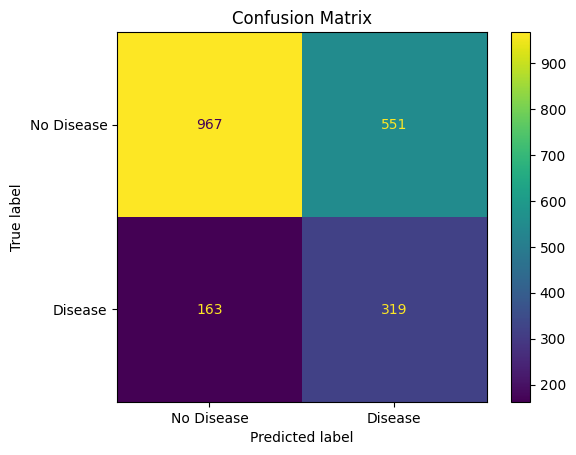

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, display_labels=["No Disease", "Disease"])
plt.title("Confusion Matrix")
plt.show()

# 6. Training Random Forest Model

In [22]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight='balanced',
    random_state=42
)

rf_model.fit(X_train, y_train)

rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

rf_train_accuracy = accuracy_score(y_train, rf_train_pred)
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)

print("Random Forest Train Accuracy:", rf_train_accuracy)
print("Random Forest Test Accuracy:", rf_test_accuracy)
print("\nRF Classification Report:\n", classification_report(y_test, rf_test_pred))


Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 0.8605

RF Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1518
           1       0.79      0.57      0.66       482

    accuracy                           0.86      2000
   macro avg       0.83      0.76      0.79      2000
weighted avg       0.86      0.86      0.85      2000



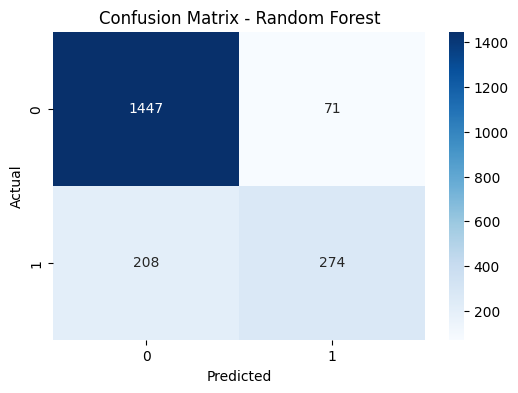

In [24]:
cm = confusion_matrix(y_test, rf_test_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# 7. Training XGBoost Model

In [25]:
neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
ratio = neg_count / pos_count

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=ratio,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)

xgb_train_pred = xgb_model.predict(X_train)
xgb_test_pred = xgb_model.predict(X_test)

xgb_train_accuracy = accuracy_score(y_train, xgb_train_pred)
xgb_test_accuracy = accuracy_score(y_test, xgb_test_pred)



In [26]:
print("XGB Train Accuracy:", xgb_train_accuracy)
print("XGB Test Accuracy:", xgb_test_accuracy)
print("\nXGB Classification Report:\n", classification_report(y_test, xgb_test_pred))


XGB Train Accuracy: 0.860125
XGB Test Accuracy: 0.8295

XGB Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89      1518
           1       0.64      0.69      0.66       482

    accuracy                           0.83      2000
   macro avg       0.77      0.78      0.77      2000
weighted avg       0.83      0.83      0.83      2000



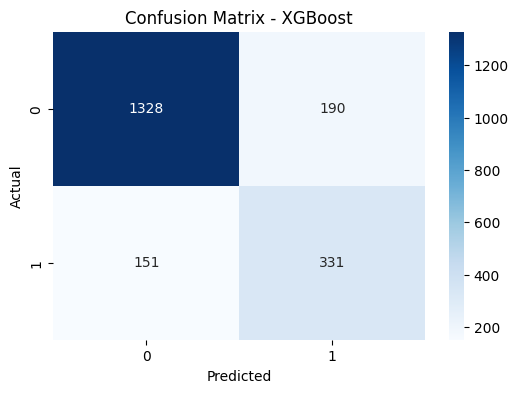

In [27]:
cm = confusion_matrix(y_test, xgb_test_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# 8. Training Light Gradient Boosting (LGB) Model

In [28]:
lgb_model = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight={0:1, 1:ratio},
    random_state=42
)

lgb_model.fit(X_train, y_train)

lgb_train_pred = lgb_model.predict(X_train)
lgb_test_pred = lgb_model.predict(X_test)

lgb_train_accuracy = accuracy_score(y_train, lgb_train_pred)
lgb_test_accuracy = accuracy_score(y_test, lgb_test_pred)


[LightGBM] [Info] Number of positive: 1928, number of negative: 6072
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000654 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


In [29]:

print("LGBM Train Accuracy:", lgb_train_accuracy)
print("LGBM Test Accuracy:", lgb_test_accuracy)
print("\nLGBM Classification Report:\n", classification_report(y_test, lgb_test_pred))


LGBM Train Accuracy: 0.912625
LGBM Test Accuracy: 0.8385

LGBM Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      1518
           1       0.67      0.66      0.66       482

    accuracy                           0.84      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.84      0.84      0.84      2000



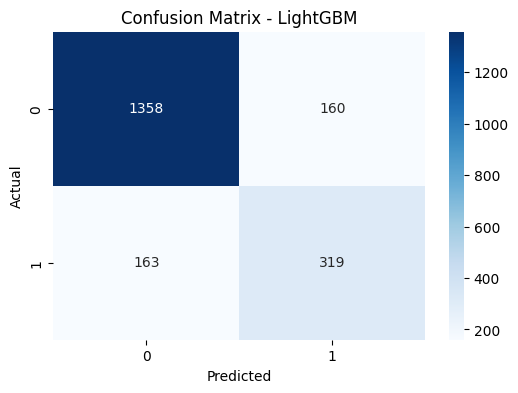

In [30]:
# FIXED: Changed 'y_test_pred_lgb' to 'lgb_test_pred'
cm = confusion_matrix(y_test, lgb_test_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LightGBM")
plt.show()

# 9. Training KNN Model

In [31]:
knn_model = KNeighborsClassifier(n_neighbors=7)

knn_model.fit(X_train_scaled, y_train)

knn_train_pred = knn_model.predict(X_train_scaled)
knn_test_pred = knn_model.predict(X_test_scaled)

knn_train_accuracy = accuracy_score(y_train, knn_train_pred)
knn_test_accuracy = accuracy_score(y_test, knn_test_pred)

print("KNN Train Accuracy:", knn_train_accuracy)
print("KNN Test Accuracy:", knn_test_accuracy)
print("\nKNN Classification Report:\n", classification_report(y_test, knn_test_pred))


KNN Train Accuracy: 0.863875
KNN Test Accuracy: 0.8395

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1518
           1       0.74      0.51      0.61       482

    accuracy                           0.84      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.83      0.84      0.83      2000



# 10. Evaluating Models' Performance

In [32]:
plt.figure(figsize=(10, 8))

models = {
    "Logistic Regression": logreg_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "LightGBM": lgb_model,
    "KNN": knn_model
}

<Figure size 1000x800 with 0 Axes>

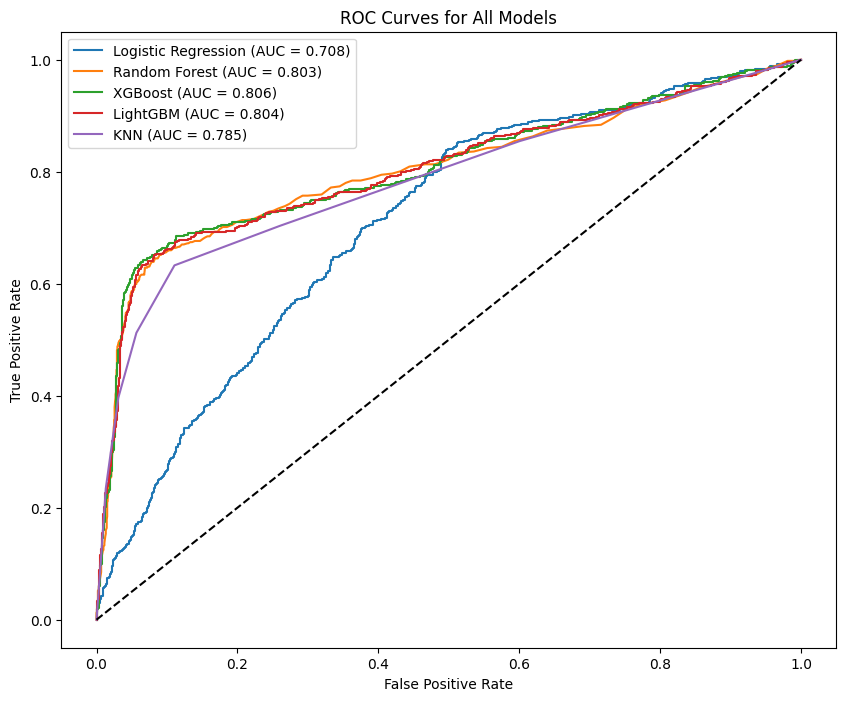

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

models = {
    "Logistic Regression": logreg_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "LightGBM": lgb_model,
    "KNN": knn_model
}

for name, model in models.items():

    # choose correct test data
    if name in ["Logistic Regression", "KNN", "SVM"]:
        X_input = X_test_scaled
    else:
        X_input = X_test

    # get probabilities for ROC
    y_pred_proba = model.predict_proba(X_input)[:, 1]

    # compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # plot curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# diagonal baseline
plt.plot([0, 1], [0, 1], "k--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend()
plt.show()


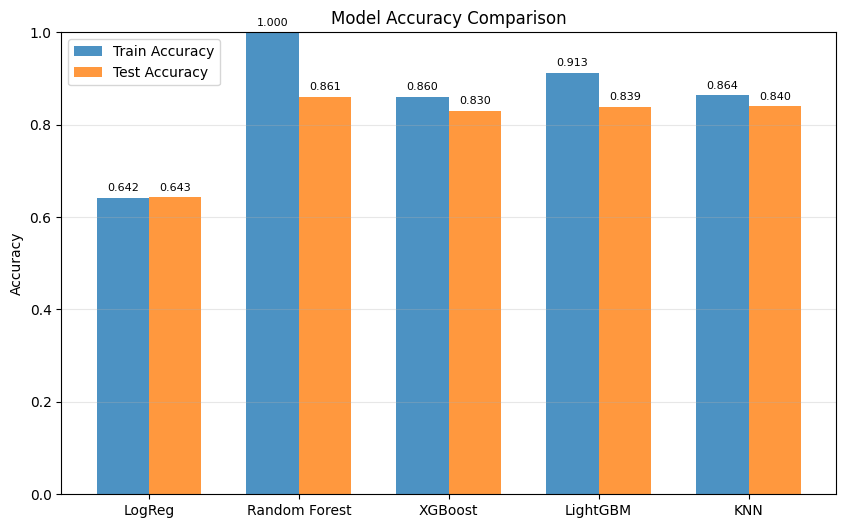

In [34]:
# ==================== ACCURACY COMPARISON ====================
models = ["LogReg", "Random Forest", "XGBoost", "LightGBM", "KNN"]

train_accuracies = [
    logreg_train_accuracy,
    rf_train_accuracy,
    xgb_train_accuracy,
    lgb_train_accuracy,
    knn_train_accuracy
]

test_accuracies = [
    logreg_test_accuracy,
    rf_test_accuracy,
    xgb_test_accuracy,
    lgb_test_accuracy,
    knn_test_accuracy
]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(10, 6))

plt.bar(x - width/2, train_accuracies, width, label='Train Accuracy', alpha=0.8)
plt.bar(x + width/2, test_accuracies, width, label='Test Accuracy', alpha=0.8)

plt.xticks(x, models)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.legend()
plt.ylim(0, 1)
plt.grid(True, alpha=0.3, axis='y')

for i, (train_acc, test_acc) in enumerate(zip(train_accuracies, test_accuracies)):
    plt.text(i - width/2, train_acc + 0.01, f'{train_acc:.3f}', ha='center', va='bottom', fontsize=8)
    plt.text(i + width/2, test_acc + 0.01, f'{test_acc:.3f}', ha='center', va='bottom', fontsize=8)

plt.show()


/tmp/ipython-input-1881013387.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=features, orient='h', palette='viridis')


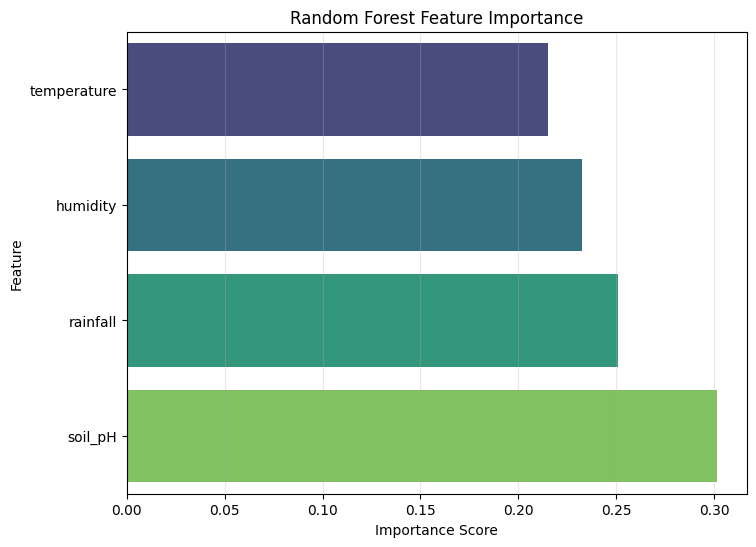

In [36]:
importance = rf_model.feature_importances_
features = X_train.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=importance, y=features, orient='h', palette='viridis')
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(True, alpha=0.3, axis='x')
plt.show()

In [37]:
# ==================== SUMMARY RESULTS ====================
print("\n" + "="*60)
print("FINAL MODEL COMPARISON SUMMARY")
print("="*60)
print(f"{'Model':<20} {'Train Acc':<12} {'Test Acc':<12} {'Difference':<12}")
print("-"*60)
for i, model_name in enumerate(models):
    train_acc = train_accuracies[i]
    test_acc = test_accuracies[i]
    diff = train_acc - test_acc
    print(f"{model_name:<20} {train_acc:<12.4f} {test_acc:<12.4f} {diff:<12.4f}")
print("="*60)

# Find best model
best_model_idx = np.argmax(test_accuracies)
best_model_name = models[best_model_idx]
best_test_acc = test_accuracies[best_model_idx]
print(f"\nBest Model: {best_model_name} with Test Accuracy: {best_test_acc:.4f}")
print("="*60)


FINAL MODEL COMPARISON SUMMARY
Model                Train Acc    Test Acc     Difference  
------------------------------------------------------------
LogReg               0.6424       0.6430       -0.0006     
Random Forest        1.0000       0.8605       0.1395      
XGBoost              0.8601       0.8295       0.0306      
LightGBM             0.9126       0.8385       0.0741      
KNN                  0.8639       0.8395       0.0244      

Best Model: Random Forest with Test Accuracy: 0.8605
